In [1]:
# Import dependencies
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load File
path = "Resources/players_fifa22.csv"
df = pd.read_csv(path)

In [3]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [4]:
# Dropping all Goal Keepers
df = df[(df["BestPosition"] != "GK")]

In [5]:
# Changing High Medium and Low Values
df = df.replace(["High", "Medium", "Low"], [2,1,0])

In [6]:
# Create List of Columns to drop
columns_to_drop = ["ID","Name","FullName","PhotoUrl","Nationality","Potential","Growth","TotalStats",
                    "BaseStats","Positions","BestPosition","Club","ClubPosition","ContractUntil","ClubNumber",
                    "ClubJoined","OnLoad","NationalTeam","NationalPosition","NationalNumber", "IntReputation",
                    "PreferredFoot",'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
                    'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
                    'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
                    'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
                    'GKRating']

In [7]:
df = df.drop(columns=columns_to_drop)

In [8]:
df.columns

Index(['Age', 'Height', 'Weight', 'Overall', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'WeakFoot', 'SkillMoves', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

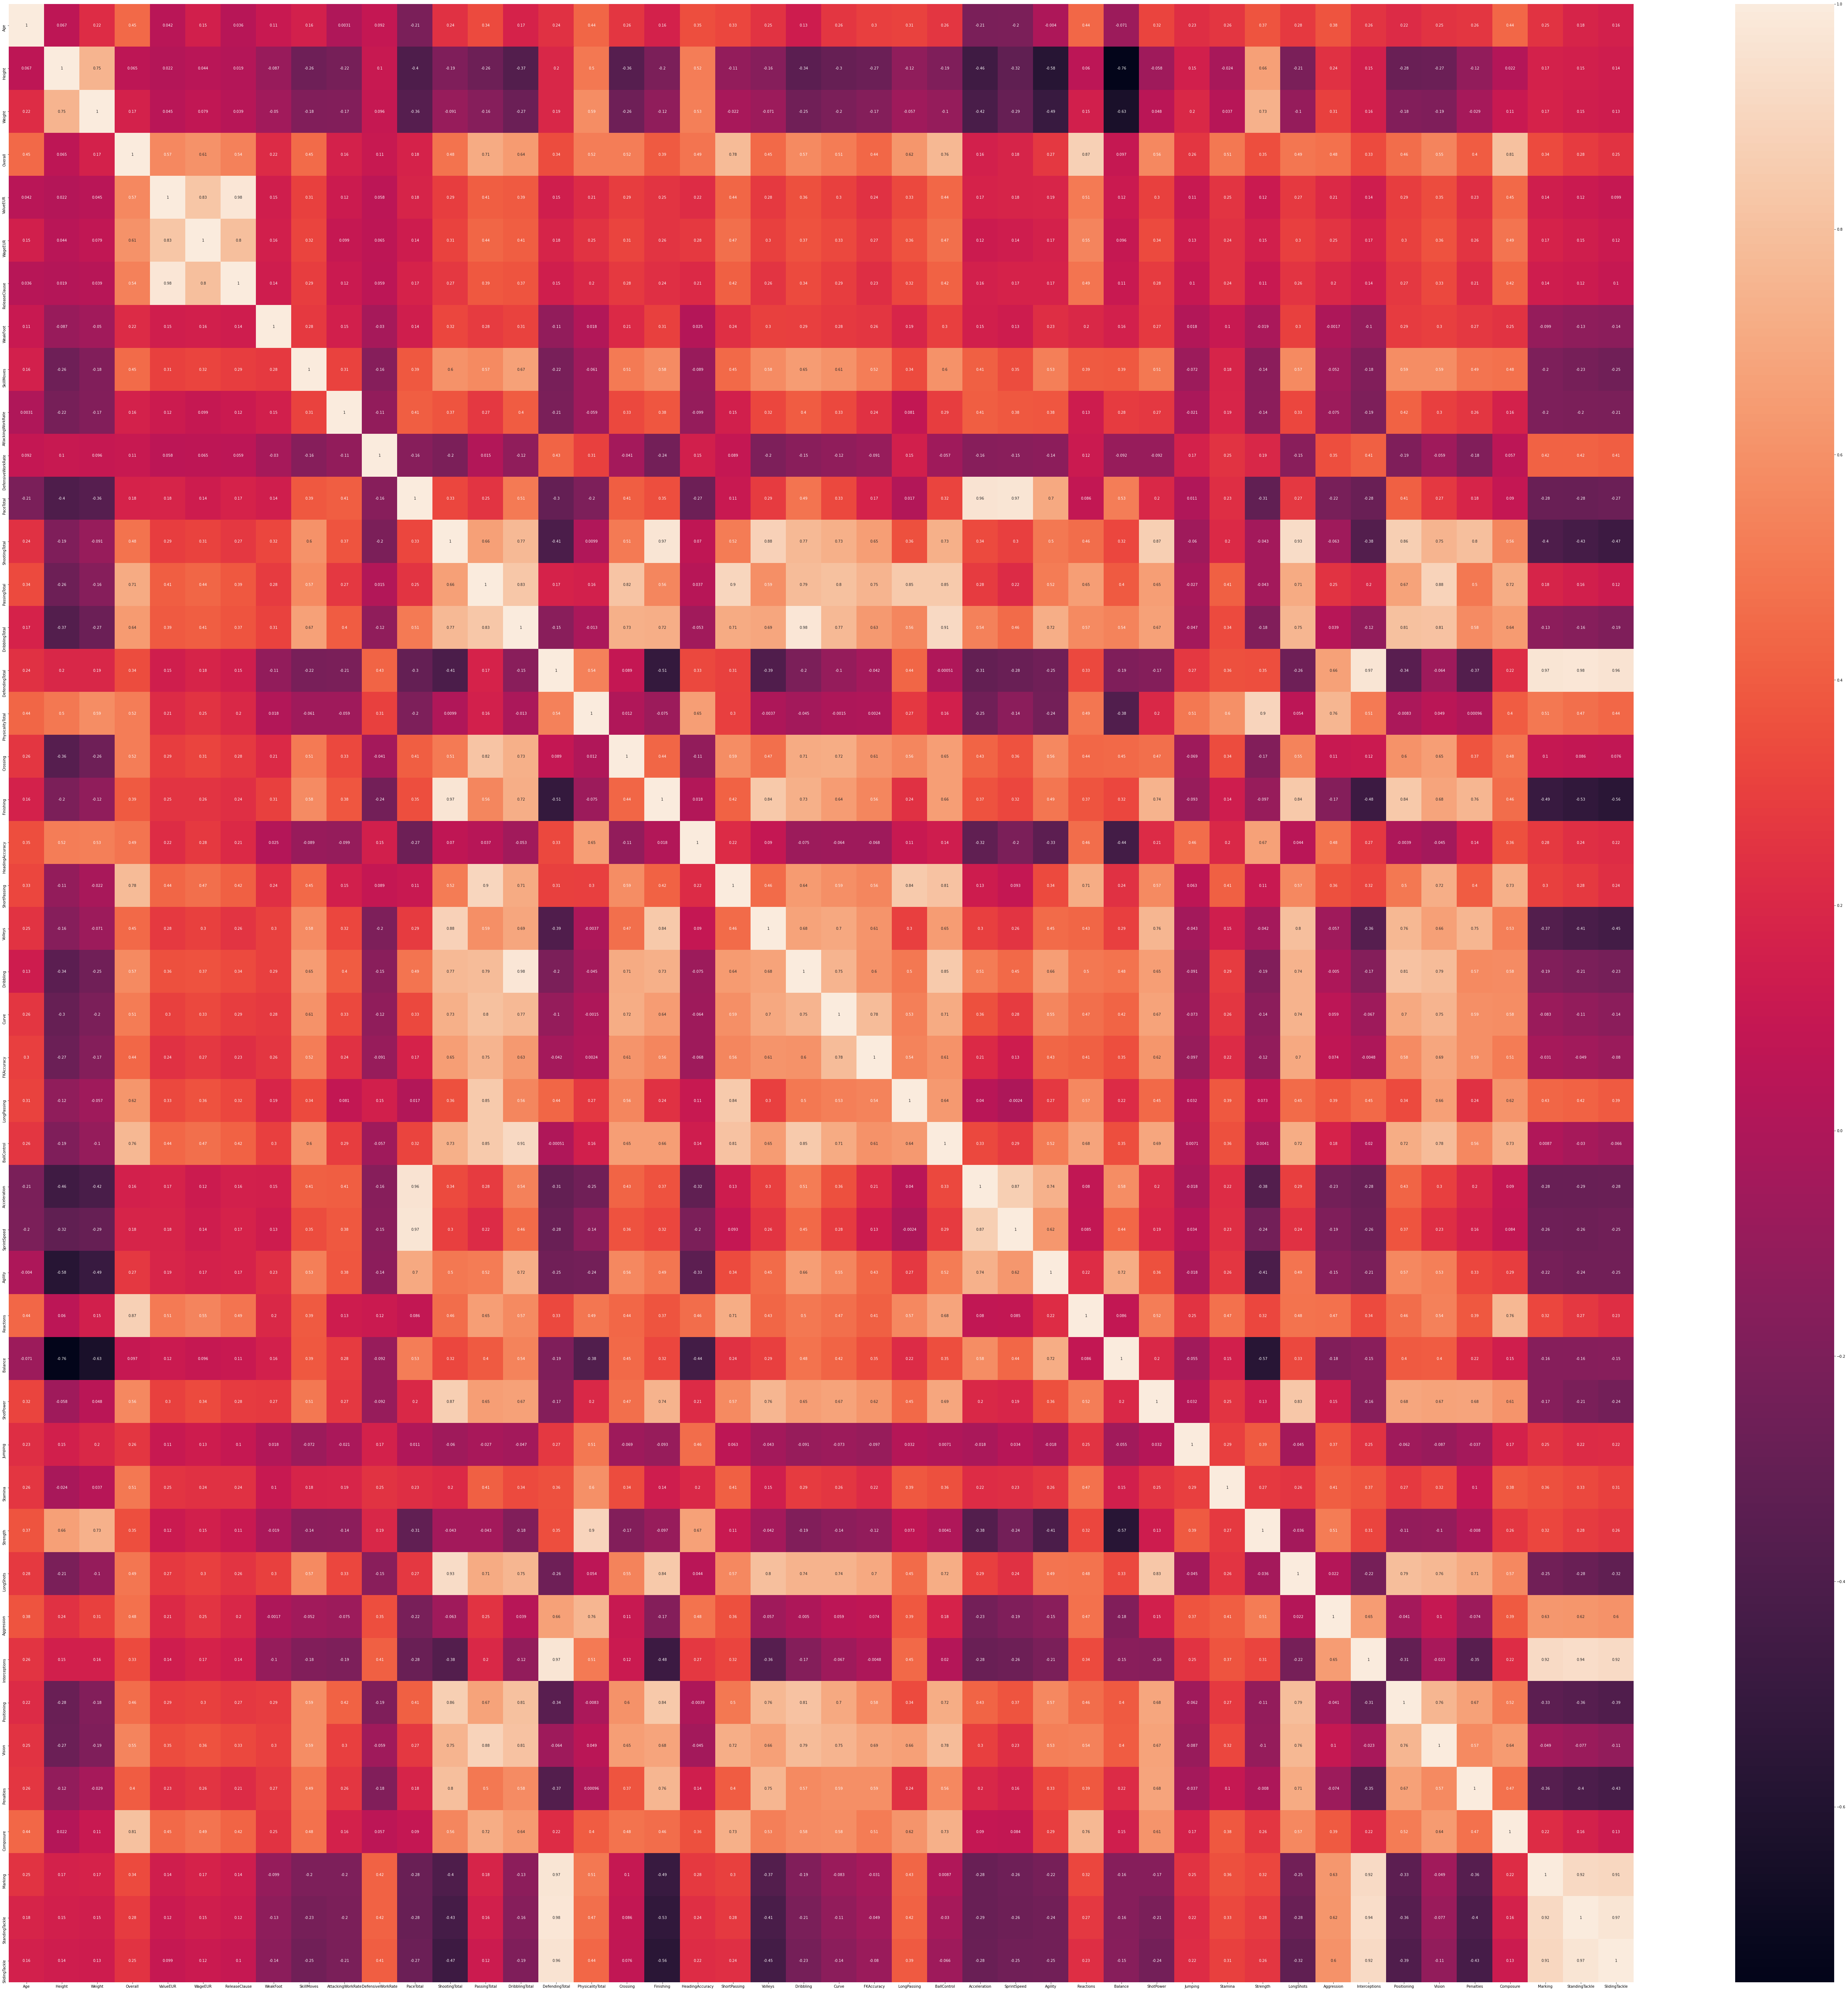

In [9]:
# Create Correlation Matrix
name = df.corr()
plt.subplots(figsize=(100,100))
sn.heatmap(name, annot=True)  
plt.savefig("CorrelationHeatMap.png")
plt.show()

In [10]:
# Dropping higly co-relateed columns
drop_columns = ["Finishing","Dribbling",'Acceleration','SprintSpeed',"StandingTackle",
                'Marking', 'StandingTackle', 'SlidingTackle',"Reactions"]

In [11]:
new_df = df.drop(columns=drop_columns)

In [12]:
# Use get dummies to encode the data
new_df2=pd.get_dummies(new_df)

In [13]:
# Drop all null values
new_df2=new_df2.dropna()

In [14]:
# Create variables for features and targets
y = new_df2["Overall"]
y1 = new_df2["ValueEUR"]
y2 = new_df2["WageEUR"]
y3 = new_df2["ReleaseClause"]
X = new_df2.drop(columns=["Overall", "ValueEUR", "WageEUR", "ReleaseClause"])
X.head()

,Age,Height,Weight,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,34,170,72,4,4,1,0,85,92,91,...,68,72,69,94,44,40,93,95,75,96
1,32,185,81,4,4,2,1,78,92,79,...,85,76,86,87,81,49,95,81,90,88
2,36,187,83,4,5,2,0,87,94,80,...,95,77,77,93,63,29,95,76,88,95
3,22,182,73,4,5,2,0,97,88,80,...,78,88,77,82,62,38,92,82,79,88
5,30,181,70,5,4,2,2,76,86,93,...,63,89,74,91,76,66,88,94,83,89


In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [16]:
# Scale the data using Standard Scaler
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Get a random forest classifier score
clf=RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.3185530921820303

In [18]:
# Get feature importances to confirm no featuring is overpowering the model
sorted(list(zip(clf.feature_importances_, X_train.columns)), reverse=True)

[(0.056273617155736366, 'DefendingTotal'),
 (0.04092794467930373, 'BallControl'),
 (0.040746507233966354, 'Interceptions'),
 (0.03975080395038787, 'DribblingTotal'),
 (0.03776524685134727, 'Positioning'),
 (0.0368707782456782, 'Crossing'),
 (0.036322779716372544, 'PaceTotal'),
 (0.0347363965050929, 'HeadingAccuracy'),
 (0.03436628605131137, 'Composure'),
 (0.03422504372691872, 'ShootingTotal'),
 (0.03390338241482646, 'Stamina'),
 (0.033365561123691205, 'ShortPassing'),
 (0.03240000817002718, 'Aggression'),
 (0.03201407233611837, 'PhysicalityTotal'),
 (0.029736329033770912, 'Jumping'),
 (0.029694706887907017, 'ShotPower'),
 (0.02897228226621751, 'Vision'),
 (0.028870304672967837, 'Strength'),
 (0.02866267025217198, 'Agility'),
 (0.028546512815778833, 'LongShots'),
 (0.028428596365075092, 'PassingTotal'),
 (0.028302815614217512, 'LongPassing'),
 (0.028251753289182314, 'Curve'),
 (0.02780090209728368, 'Penalties'),
 (0.027785888243687086, 'Volleys'),
 (0.027390608320275955, 'FKAccuracy'),

In [19]:
# Use a Random FOrest Regressor to create a prediction model
clr = RandomForestRegressor()
clr.fit(X_train_scaled, y_train)
clr.score(X_test_scaled, y_test)

0.9718223002353655

In [20]:
sorted(list(zip(clr.feature_importances_, X_train.columns)), reverse=True)

[(0.4347596204248763, 'Composure'),
 (0.2332458576543358, 'BallControl'),
 (0.17213946925406623, 'DefendingTotal'),
 (0.02833333599222888, 'DribblingTotal'),
 (0.027686756085555934, 'Positioning'),
 (0.019290980871895173, 'Crossing'),
 (0.016489428315057918, 'ShootingTotal'),
 (0.009981145937162475, 'Stamina'),
 (0.009426542164354514, 'PhysicalityTotal'),
 (0.00843839483355863, 'PaceTotal'),
 (0.005386469822695607, 'Interceptions'),
 (0.004809143163138646, 'ShortPassing'),
 (0.0039044660172503055, 'HeadingAccuracy'),
 (0.003804667331520505, 'PassingTotal'),
 (0.0023367074404449426, 'Aggression'),
 (0.0017646454935891045, 'Vision'),
 (0.0017224246301808294, 'ShotPower'),
 (0.0016293380118908136, 'LongShots'),
 (0.001525150964490882, 'Age'),
 (0.0014795205301497158, 'LongPassing'),
 (0.0014563139622695218, 'Strength'),
 (0.001346795874500345, 'Jumping'),
 (0.0012249951432613203, 'Agility'),
 (0.0010841183120784564, 'Volleys'),
 (0.0010388943290459232, 'Penalties'),
 (0.001037523648195472

<AxesSubplot:>

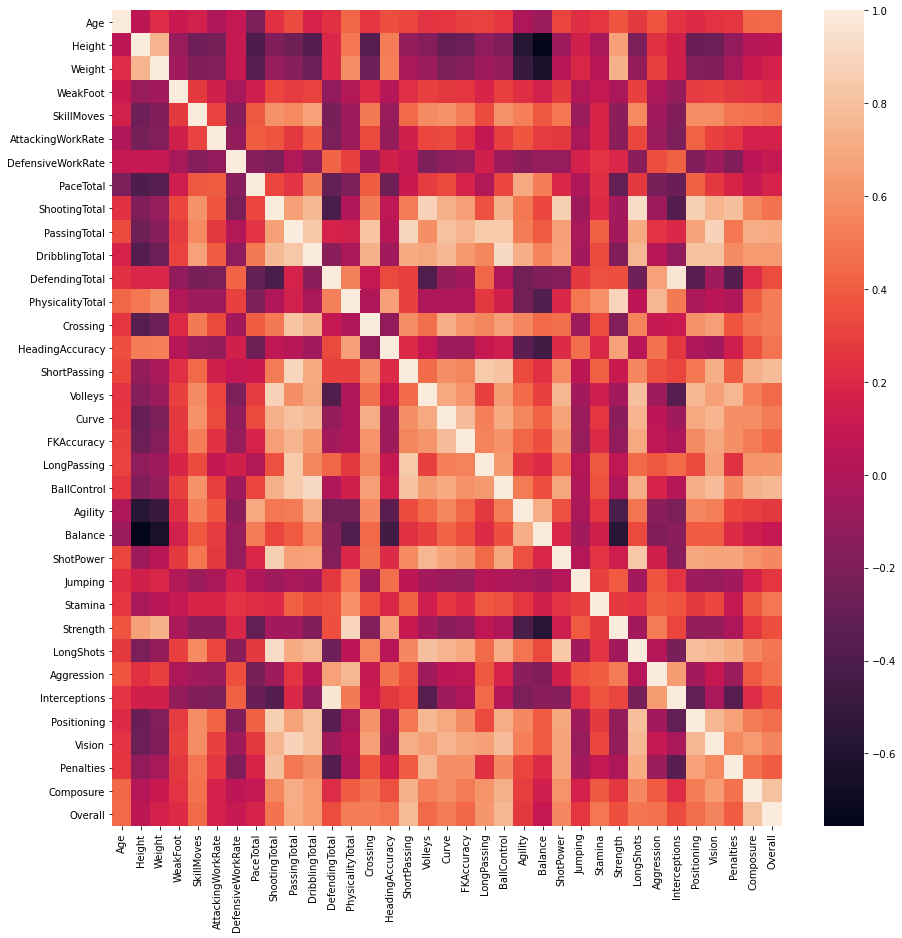

In [21]:
# View Co-realtion matrix for X and Y
plt.figure(figsize=(15, 15))
sn.heatmap(pd.concat([X,y], axis=1).corr())

In [22]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr = RandomForestRegressor()
clr.fit(X_train_scaled, y_train)
clr.score(X_test_scaled, y_test)

0.8402203865754625

In [23]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr = RandomForestRegressor()
clr.fit(X_train_scaled, y_train)
clr.score(X_test_scaled, y_test)

0.6785685649223034

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.1)
# Scale the data using Standard Scaler
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use a Random FOrest Regressor to create a prediction model
clr = RandomForestRegressor()
clr.fit(X_train_scaled, y_train)
clr.score(X_test_scaled, y_test)

0.8468405496604869

In [24]:
import pickle
pickle.dump(clr, open('model.sav', 'wb'))